# Gene loss vs stratum age. 

The rate of gene loss on sex chromosomes is not expected to be linear. Genes which can tolerate the loss of an allele (i.e. dosage insensitive) can be lost relatively easily, while those which are dosage sensitive cannot easily be lost. Thus, overtime, sex chromosomes will lose gene content until most remaining genes are dosage sensitive. 

This dynamic means that gene loss on sex chromosomes is not linear. Once most of the dosage insensitive genes are lost, gene loss will slow down. 

In the stickleback, we have a nice opportunity to show this. We have multiple strata, in two species, which have all lost genes. Some strata are realrtively old, and have lost a lot of genes, some are younger, with modest gene loss. This spread means we can plot gene loss against the age of a stratum, and so we should see a non-linear gene loss pattern across the different strata ages. Lets do it. 


## Ages of strata

Dating strata is somewhat complicated, as it requires a good clock, and a male mutation rate bias estimate. Also, given the young age of some strata, the error bars on their age estimates in particular will be large. 

We can therefore focus on relative age, as assessed with dS. 

## Gene loss

Gene loss is easier. We have lists of orthologs from our Orthofinder analyses. From these I can see which genes have been lost from the Y

### G. aculeatus

In [1]:
Ga_dS_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Ga/dNdS.results"
Ga_Y_lost_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Ga/Ga_Y_lost.txt"

ds_dict = {}
Y_lost_list = []

with open(Ga_dS_path) as Ga_dS:
    for line in Ga_dS:
        ds_dict[int(line.split()[2])] = float(line.split()[8])
        
with open(Ga_Y_lost_path) as Ga_Y_lost:
    next(Ga_Y_lost)
    for line in Ga_Y_lost:
        Y_lost_list.append(int(line.split()[2]))


### Strata 

In [6]:
PAR = (0, 2500000)
S2 = (2500000, 6900000)
S3 = (6900000, 12500000)
S1 = (12500000, 20000000)

In [26]:
strata_dict = {}
strata_dict["PAR"] = {}
strata_dict["PAR"]["dS"] = []
strata_dict["PAR"]["lost"] = []
strata_dict["S1"] = {}
strata_dict["S1"]["dS"] = []
strata_dict["S1"]["lost"] = []
strata_dict["S2"] = {}
strata_dict["S2"]["dS"] = []
strata_dict["S2"]["lost"] = []
strata_dict["S3"] = {}
strata_dict["S3"]["dS"] = []
strata_dict["S3"]["lost"] = []

for locus in ds_dict:
        
    #print(locus)
    
    if PAR[0] < locus <= PAR[1]:
        strata_dict["PAR"]["dS"].append(ds_dict[locus])
    elif S1[0] < locus <= S1[1]:
        strata_dict["S1"]["dS"].append(ds_dict[locus])
    elif S2[0] < locus <= S2[1]:
        strata_dict["S2"]["dS"].append(ds_dict[locus])
    elif S3[0] < locus <= S3[1]:
        strata_dict["S3"]["dS"].append(ds_dict[locus])
        
for lost in Y_lost_list:

    if PAR[0] < lost <= PAR[1]:
        strata_dict["PAR"]["lost"].append(lost)
    if S1[0] < lost <= S1[1]:
        strata_dict["S1"]["lost"].append(lost)
    if S2[0] < lost <= S2[1]:
        strata_dict["S2"]["lost"].append(lost)
    if S3[0] < lost <= S3[1]:
        strata_dict["S3"]["lost"].append(lost)
    

In [13]:
locus

19575083

In [21]:
for stratum in strata_dict:
    print(stratum, len(strata_dict[stratum]["dS"]))

PAR 4
S1 53
S2 89
S3 149


In [27]:
import numpy as np

#' points to plot
dSvslost = {}

stratum = "S1"
dSvslost[stratum] = {}
dSvslost[stratum]["meandS"] = np.round(np.mean(strata_dict[stratum]["dS"]),4)
dSvslost[stratum]["N_lost"] = len(strata_dict[stratum]["lost"])

stratum = "S2"
dSvslost[stratum] = {}
dSvslost[stratum]["meandS"] = np.round(np.mean(strata_dict[stratum]["dS"]),4)
dSvslost[stratum]["N_lost"] = len(strata_dict[stratum]["lost"])

stratum = "S3"
dSvslost[stratum] = {}
dSvslost[stratum]["meandS"] = np.round(np.mean(strata_dict[stratum]["dS"]),4)
dSvslost[stratum]["N_lost"] = len(strata_dict[stratum]["lost"])


In [28]:
dSvslost

{'S1': {'meandS': 0.1576, 'N_lost': 416},
 'S2': {'meandS': 0.0718, 'N_lost': 64},
 'S3': {'meandS': 0.0766, 'N_lost': 85}}

### Now I just need the original number of genes on the X, so I can calculate the proportion lost

In [29]:
gff3_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Ga/Ga.longest.gff3"

S1_genes = []
S2_genes = []
S3_genes = []

with open(gff3_path) as gff3:
    for line in gff3:
        if line.split()[0] == "chrXIX" and line.split()[2] == "gene":
            if S1[0] < int(line.split()[3]) <= S1 [1]:
                S1_genes.append(line.split()[3])
            elif S2[0] < int(line.split()[3]) <= S2 [1]:
                S2_genes.append(line.split()[3])
            elif S3[0] < int(line.split()[3]) <= S3 [1]:
                S3_genes.append(line.split()[3])
            

In [36]:
print(len(S1_genes), len(S2_genes), len(S3_genes))

523 222 295


In [34]:
dSvslost["S1"]["proplost"] = dSvslost["S1"]["N_lost"]/len(S1_genes)
dSvslost["S2"]["proplost"] = dSvslost["S2"]["N_lost"]/len(S2_genes)
dSvslost["S3"]["proplost"] = dSvslost["S3"]["N_lost"]/len(S3_genes)

In [35]:
dSvslost

{'S1': {'meandS': 0.1576, 'N_lost': 416, 'proplost': 0.7954110898661568},
 'S2': {'meandS': 0.0718, 'N_lost': 64, 'proplost': 0.2882882882882883},
 'S3': {'meandS': 0.0766, 'N_lost': 85, 'proplost': 0.288135593220339}}

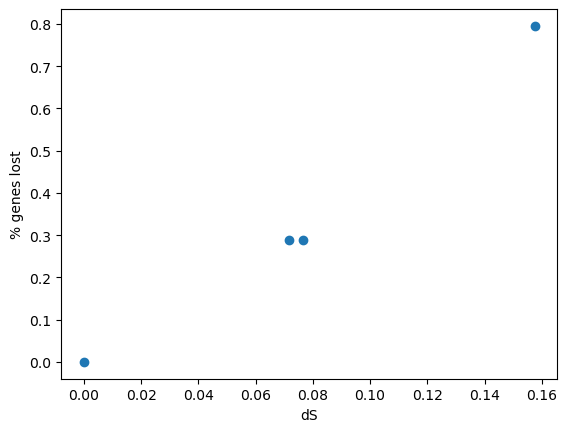

In [39]:
from matplotlib import pyplot as plt

x = [0, 0.1576, 0.0718, 0.0766]
y = [0, 0.7954110898661568, 0.2882882882882883, 0.288135593220339]

plt.scatter(x,y)
plt.ylabel("% genes lost")
plt.xlabel("dS")
plt.show()


hmmm, this is not the trend I was imagining. . . but I suppose 0 is not necassarily a good place to start. . . if we took any autosome, and calculated dS between the homologs, I guess it wouldn't be zero. 

Lets see what the Gw plot looks like, as there are more points to plot there. Though we need to define some boundaries . . . .



## G. wheatlandi

### Strata 

Before I can properly set up this plot, I need to know where S1 was in Gw. Obviously, there is no remnents of this on the ChrY, but I can check where the S1 genes in Ga are in the Gw X, this would give me the old S1 position on the Gw X. 

First, get Ga S1 genes.

In [225]:
Ga_dS_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Ga/dNdS.results"

S1 = (12500000, 20000000)
Ga_S1_genes = []

with open(Ga_dS_path) as Ga_dS:
    for line in Ga_dS:
        gene = line.split()[0]
        pos = int(line.split()[2])
        
        if S1[0] < pos <= S1[1]:
            Ga_S1_genes.append(gene)

In [89]:
Ga_S1_genes

['rna-XM_040162583.1',
 'rna-XM_040162844.1',
 'rna-XM_040163204.1',
 'rna-XM_040163938.1',
 'rna-XM_040161866.1',
 'rna-XM_040161871.1',
 'rna-XM_040163689.1',
 'rna-XM_040162331.1',
 'rna-XM_040163874.1',
 'rna-XM_040162246.1',
 'rna-XM_040162703.1',
 'rna-XM_040162455.1',
 'rna-XM_040162059.1',
 'rna-XM_040163567.1',
 'rna-XM_040163562.1',
 'rna-XM_040161846.1',
 'rna-XM_040162898.1',
 'rna-XM_040162959.1',
 'rna-XM_040163553.1',
 'rna-XM_040162161.1',
 'rna-XM_040162346.1',
 'rna-XM_040163100.1',
 'rna-XM_040162280.1',
 'rna-XM_040162284.1',
 'rna-XM_040163385.1',
 'rna-XM_040163393.1',
 'rna-XM_040163384.1',
 'rna-XM_040163403.1',
 'rna-XM_040162989.1',
 'rna-XM_040163303.1',
 'rna-XM_040161584.1',
 'rna-XM_040162169.1',
 'rna-XM_040163424.1',
 'rna-XM_040163445.1',
 'rna-XM_040162689.1',
 'rna-XM_040162057.1',
 'rna-XM_040162024.1',
 'rna-XM_040163406.1',
 'rna-XM_040162093.1',
 'rna-XM_040162095.1',
 'rna-XM_040162145.1',
 'rna-XM_040163704.1',
 'rna-XM_040163636.1',
 'rna-XM_04

Now find the Gw orthologs of these genes. 

In [95]:
Gw_S1_genes = []
with open("/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Gw/N0.tsv") as N0:
    for line in N0:
        for Ga_gene in Ga_S1_genes:
            if Ga_gene in line.split():
                for gene in line.split():
                    if "GwA" in gene:
                        if gene not in Gw_S1_genes:
                            Gw_S1_genes.append(gene.strip(","))
    

Ok, now I just need to get the positions of these genes on the Gw Chr19

In [100]:
Gw_S1_genes

['GwA_30830-RA',
 'GwA_30662-RA',
 'GwA_30661-RA',
 'GwA_30446-RA',
 'GwA_30894-RA',
 'GwA_30765-RA',
 'GwA_30677-RA',
 'GwA_30678-RA',
 'GwA_30860-RA',
 'GwA_30825-RA',
 'GwA_30360-RA',
 'GwA_30669-RA',
 'GwA_30684-RA',
 'GwA_30565-RA',
 'GwA_30581-RA',
 'GwA_30582-RA',
 'GwA_30535-RA',
 'GwA_30418-RA',
 'GwA_02658-RA',
 'GwA_30666-RA',
 'GwA_30369-RA',
 'GwA_01911-RA',
 'GwA_30680-RA',
 'GwA_30785-RA',
 'GwA_30370-RA',
 'GwA_30826-RA',
 'GwA_30824-RA',
 'GwA_30318-RA',
 'GwA_30816-RA',
 'GwA_30831-RA',
 'GwA_30614-RA',
 'GwA_30618-RA',
 'GwA_30620-RA',
 'GwA_30647-RA',
 'GwA_30655-RA',
 'GwA_30547-RA',
 'GwA_30525-RA',
 'GwA_30513-RA',
 'GwA_30756-RA',
 'GwA_30823-RA',
 'GwA_30827-RA',
 'GwA_30906-RA',
 'GwA_30579-RA',
 'GwA_30622-RA',
 'GwA_30626-RA',
 'GwA_30634-RA',
 'GwA_30403-RA',
 'GwA_30319-RA',
 'GwA_30633-RA',
 'GwA_30526-RA',
 'GwA_30800-RA']

In [114]:
Gw_S1_gene_positions = []
with open("/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Gw/Gw.longest.gff3") as GwGff3:
    next(GwGff3)
    for line in GwGff3:
        if line.split()[2] == "mRNA":
            for gene in Gw_S1_genes:
                if gene in line:
                    if line.split()[0] == "chr19":
                        Gw_S1_gene_positions.append(int(line.split()[3]))
                        Gw_S1_gene_positions.append(int(line.split()[4])) ## adding the stop positions too


In [115]:
print("S1 start gene = %s\nS1 end gene = %s" % (min(Gw_S1_gene_positions),max(Gw_S1_gene_positions)))

S1 start gene = 14216366
S1 end gene = 21435079


So I will add some buffer to this, I'll start S1 from ~1kb lower (14215000), and end at the end of the chromosome. 

Below then are the strata / block locations for Gw

In [226]:
## set up the block dictionary

Gw_blocks = {}

Gw_blocks["b19_1"] = {}
Gw_blocks["b19_1"]["chrom"] = "chr19"
Gw_blocks["b19_1"]["coords"] = (14215000, 22650000)
Gw_blocks["b19_2"] = {}
Gw_blocks["b19_2"]["chrom"] = "chr19"
Gw_blocks["b19_2"]["coords"] = (0, 14215000) ## this is the rest of the chr that is not orthologous to Ga S1. 

Gw_blocks["b12_1"] = {}
Gw_blocks["b12_1"]["chrom"] = "chr12"
Gw_blocks["b12_1"]["coords"] = (21585000, 24417000)
Gw_blocks["b12_2"] = {}
Gw_blocks["b12_2"]["chrom"] = "chr12"
Gw_blocks["b12_2"]["coords"] = (19602000, 21448000)
Gw_blocks["b12_3"] = {}
Gw_blocks["b12_3"]["chrom"] = "chr12"
Gw_blocks["b12_3"]["coords"] = (17460000, 19602000)
Gw_blocks["b12_4"] = {}
Gw_blocks["b12_4"]["chrom"] = "chr12"
Gw_blocks["b12_4"]["coords"] = (16257000, 17460000) ## <<- no genes found in orthofinder
Gw_blocks["b12_5"] = {}
Gw_blocks["b12_5"]["chrom"] = "chr12"
Gw_blocks["b12_5"]["coords"] = (15350000, 16257000)
Gw_blocks["b12_6"] = {}
Gw_blocks["b12_6"]["chrom"] = "chr12"
Gw_blocks["b12_6"]["coords"] = (14552000, 15350000)
Gw_blocks["b12_7"] = {}
Gw_blocks["b12_7"]["chrom"] = "chr12"
Gw_blocks["b12_7"]["coords"] = (12265000, 14552000)
Gw_blocks["b12_8"] = {}
Gw_blocks["b12_8"]["chrom"] = "chr12"
Gw_blocks["b12_8"]["coords"] = (11664000, 12265000)
Gw_blocks["b12_9"] = {}
Gw_blocks["b12_9"]["chrom"] = "chr12"
Gw_blocks["b12_9"]["coords"] = (6202000,  11664000)
Gw_blocks["b12_PAR"] = {}
Gw_blocks["b12_PAR"]["chrom"] = "chr12"
Gw_blocks["b12_PAR"]["coords"]= (0, 6202000)



### Get the dS data

In [297]:
Gw_dS_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Gw/dNdS.results"

## make the dictionary slots needed

for block in Gw_blocks:
    Gw_blocks[block]["dS"] = []

with open(Gw_dS_path) as Gw_dS:
    for line in Gw_dS:
        chrom = line.split()[1]
        pos = int(line.split()[2])
        dS = float(line.split()[8])
        
        for block in Gw_blocks:
            if all([Gw_blocks[block]["chrom"] == chrom,
                    Gw_blocks[block]["coords"][0] < pos <= Gw_blocks[block]["coords"][1],
                    dS < 10]):

                Gw_blocks[block]["dS"].append(dS)
                


### get the Y gene loss data

In [298]:
Gw_Y_lost_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Gw/Gw_Y_lost.txt"

## make the dictionary slots needed

for block in Gw_blocks:
    Gw_blocks[block]["lost"] = []
                  
with open(Gw_Y_lost_path) as Gw_Y_lost:
    
    next(Gw_Y_lost) ## skip headers
    
    for line in Gw_Y_lost:
        chrom = line.split()[1]
        lost_pos = int(line.split()[2])
                
        for block in Gw_blocks:
            if all([Gw_blocks[block]["chrom"] == chrom,
                    Gw_blocks[block]["coords"][0] < lost_pos <= Gw_blocks[block]["coords"][1]]):
        
                Gw_blocks[block]["lost"].append(lost_pos)


### Now summarise these data 

In [299]:
## find mean dS & count number of genes lost

import numpy as np

for block in Gw_blocks:
    if block != "b12_PAR":
        Gw_blocks[block]["meandS"] = np.round(np.mean(Gw_blocks[block]["dS"]),4)
        Gw_blocks[block]["N_lost"] = len(Gw_blocks[block]["lost"])

### Now I just need the original number of genes on the X, so I can calculate the proportion lost

In [308]:
gff3_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Gw/Gw.longest.gff3"

## make dict slots

for block in Gw_blocks:
    Gw_blocks[block]["X_genes"] = []

with open(gff3_path) as gff3:
    next(gff3) ## skip headers
    for line in gff3:
        if line.split()[2] == "gene":
            chrom = line.split()[0]
            for block in Gw_blocks:
                if Gw_blocks[block]["chrom"] == chrom:
                    if Gw_blocks[block]["coords"][0] < int(line.split()[3]) <= Gw_blocks[block]["coords"][1]:
                        Gw_blocks[block]["X_genes"].append(line.split()[3])

            

### Finally, calculate the proportion of X genes lost per block

In [309]:
for block in Gw_blocks:
    Gw_blocks[block]["prop_genes_lost"] = Gw_blocks[block]["N_lost"]/len(Gw_blocks[block]["X_genes"])

In [310]:
for block in Gw_blocks:
    print(block)
    print("  N X genes = %s" % len(Gw_blocks[block]["X_genes"]))
    print("  N Y lost = %s" % Gw_blocks[block]["N_lost"])
    print("  mean dS = %s" % Gw_blocks[block]["meandS"])
    print("  prop genes lost = %s" % np.round(Gw_blocks[block]["prop_genes_lost"],4))

b19_1
  N X genes = 534
  N Y lost = 424
  mean dS = 0.2261
  prop genes lost = 0.794
b19_2
  N X genes = 648
  N Y lost = 449
  mean dS = 0.3257
  prop genes lost = 0.6929
b12_1
  N X genes = 222
  N Y lost = 12
  mean dS = 0.1095
  prop genes lost = 0.0541
b12_2
  N X genes = 235
  N Y lost = 3
  mean dS = 0.1077
  prop genes lost = 0.0128
b12_3
  N X genes = 91
  N Y lost = 4
  mean dS = 0.1989
  prop genes lost = 0.044
b12_4
  N X genes = 55
  N Y lost = 42
  mean dS = 0.0996
  prop genes lost = 0.7636
b12_5
  N X genes = 414
  N Y lost = 21
  mean dS = 0.3158
  prop genes lost = 0.0507
b12_6
  N X genes = 43
  N Y lost = 5
  mean dS = 0.0867
  prop genes lost = 0.1163
b12_7
  N X genes = 138
  N Y lost = 12
  mean dS = 0.1594
  prop genes lost = 0.087
b12_8
  N X genes = 52
  N Y lost = 3
  mean dS = 0.2935
  prop genes lost = 0.0577
b12_9
  N X genes = 369
  N Y lost = 27
  mean dS = 0.1091
  prop genes lost = 0.0732
b12_PAR
  N X genes = 321
  N Y lost = 257
  mean dS = nan
  pr

### Now plot

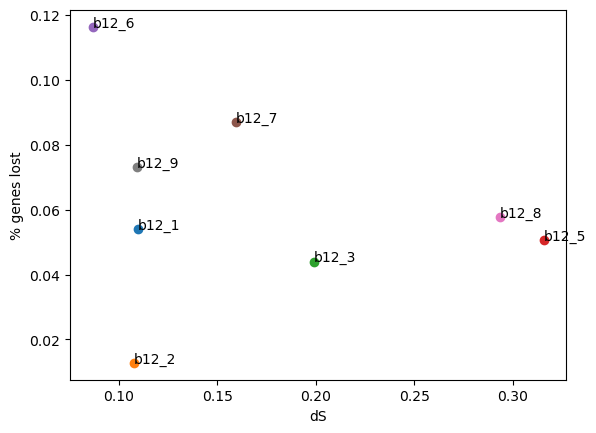

In [311]:
from matplotlib import pyplot as plt

x = [] 
y = []
labs = []

for block in Gw_blocks:
    
    if block not in ["b12_PAR", "b12_4", "b19_1", "b19_2"]:

        plt.scatter(Gw_blocks[block]['meandS'],
                    Gw_blocks[block]['prop_genes_lost'])

        plt.text(Gw_blocks[block]['meandS'],
                 Gw_blocks[block]['prop_genes_lost'], 
                 block)
                
plt.ylabel("% genes lost")
plt.xlabel("dS")

plt.show()


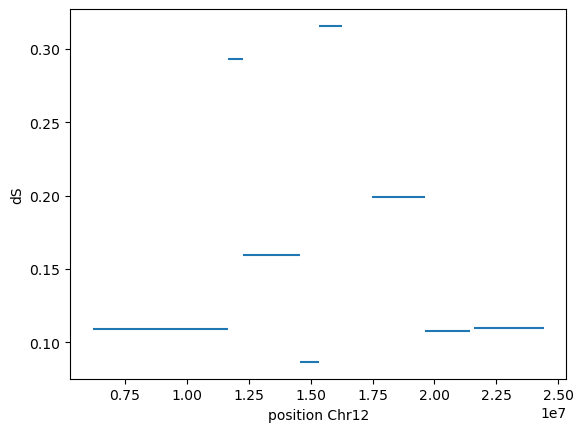

In [313]:
for block in Gw_blocks:
    
    if block not in [ "b12_PAR", "b12_4", "b19_1", "b19_2"]:

        plt.hlines(Gw_blocks[block]['meandS'],
                   Gw_blocks[block]["coords"][0],
                   Gw_blocks[block]["coords"][1])
        
plt.xlabel("position Chr12")
plt.ylabel("dS")
plt.show()

In [314]:
Gw_dS_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/M_F_stats_plots/Gw/dNdS.results"

Gw_ds_dict = {}

with open(Gw_dS_path) as Gw_dS:
    for line in Gw_dS:
        if line.split()[1] == "chr12":
            pos = int(line.split()[2])
            dS = float(line.split()[8])
            if dS < 10:
                Gw_ds_dict[pos] = dS
        
        

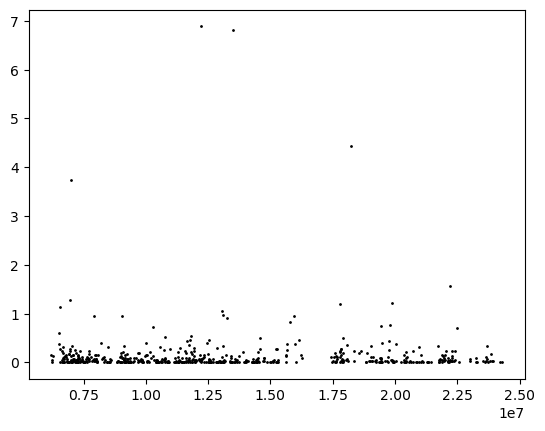

In [315]:
for pos in Gw_ds_dict:
    plt.scatter(pos, Gw_ds_dict[pos], color = "black", s = 1)
plt.show()

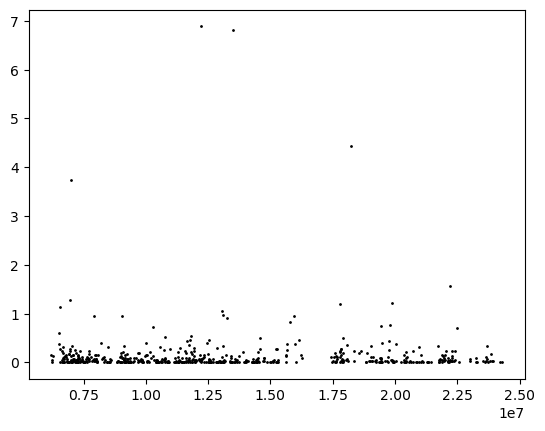

In [259]:
for pos in Gw_ds_dict:
    plt.scatter(pos, Gw_ds_dict[pos], color = "black", s = 1)
plt.show()

In [316]:
Gw_blocks[block].keys()

dict_keys(['chrom', 'coords', 'dS', 'lost', 'meandS', 'N_lost', 'X_genes', 'prop_genes_lost'])

In [317]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

23001000.0 369 5462000
20525000.0 369 5462000
18531000.0 369 5462000
15803500.0 369 5462000
14951000.0 369 5462000
13408500.0 369 5462000
11964500.0 369 5462000
8933000.0 369 5462000


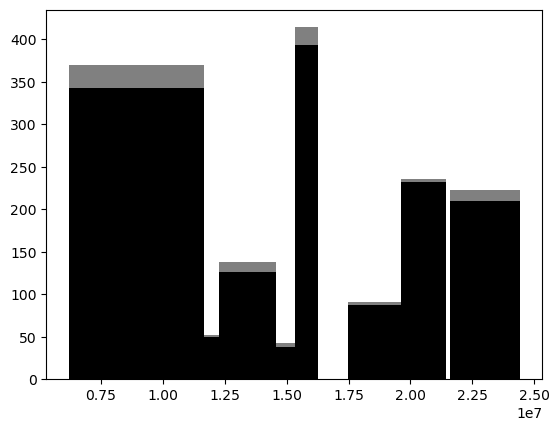

In [345]:
for block in Gw_blocks:
    
    if block not in [ "b12_PAR", "b12_4", "b19_1", "b19_2"]:

        pos = Gw_blocks[block]["coords"][0] + (Gw_blocks[block]["coords"][1] - Gw_blocks[block]["coords"][0])/2
        Xgenes = len(Gw_blocks[block]['X_genes'])
        Ygenes = len(Gw_blocks[block]['X_genes']) - Gw_blocks[block]['N_lost']
        block_width = (Gw_blocks[block]["coords"][1] - Gw_blocks[block]["coords"][0])
        
        print(pos, height, width)
        
        plt.bar(pos,
                Xgenes,
                block_width,
                color = "grey")
        
        plt.bar(pos,
                Ygenes,
                block_width,
                color = "black")
                    
plt.show()

18432500.0 369 5462000
7107500.0 369 5462000


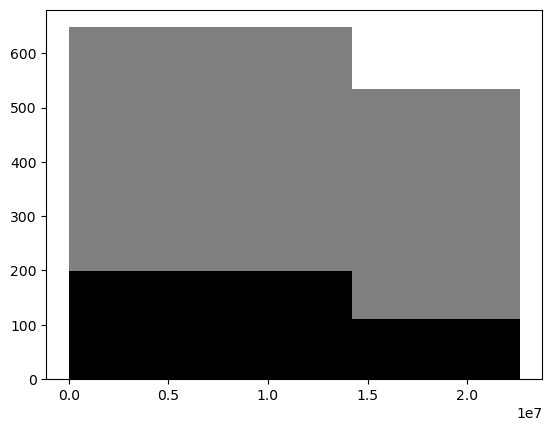

In [346]:
for block in Gw_blocks:
    
    if block not in [ "b12_PAR", "b12_1","b12_2","b12_3","b12_4","b12_5","b12_6","b12_7","b12_8","b12_9"]:

        pos = Gw_blocks[block]["coords"][0] + (Gw_blocks[block]["coords"][1] - Gw_blocks[block]["coords"][0])/2
        Xgenes = len(Gw_blocks[block]['X_genes'])
        Ygenes = len(Gw_blocks[block]['X_genes']) - Gw_blocks[block]['N_lost']
        block_width = (Gw_blocks[block]["coords"][1] - Gw_blocks[block]["coords"][0])
        
        print(pos, height, width)
        
        plt.bar(pos,
                Xgenes,
                block_width,
                color = "grey")
        
        plt.bar(pos,
                Ygenes,
                block_width,
                color = "black")
                    
plt.show()